<center>Национальный исследовательский университет ИТМО<br/>Факультет информационных технологий и программирования<br/>Прикладная математика и информатика</center>

## <center>Математическая статистика</center>
### <center>Отчёт по лабораторной работе №2</center>

<div style="text-align: right"><b>Работу выполнили:</b><br/>Белоцерковченко Андрей M3237<br/>Смирнов Андрей M3237<br/</div>

<center>Санкт-Петербург<br/>2023</center>

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [14]:
ns = [10, 100, 1000, 10000]
m = 1000
# Заданный параметр
theta_true = 5
# Заданный уровень значимости для проверки отклонения оценки от истинного параметра
significance_level = 0.05

In [13]:
# Функция плотности распределения
def f(theta, x):
    return (3 * x**2 / np.sqrt(2)) * np.exp(-((theta - x**3)**2) / 2)

In [15]:
# Функция для оценки параметра методом максимального правдоподобия
def estimate_theta(sample):
  # Функция правдоподобия
    likelihood = lambda theta: np.prod(f(theta, sample))
    
    # Максимизация функции правдоподобия с использованием minimize
    result = minimize(lambda x: -likelihood(x), x0=0, method='Nelder-Mead')
    
    return result.x[0]

In [16]:
from numpy.random._examples.numba.extending_distributions import norm

# Хранение результатов
biases = []
variances = []
mse = []
significant_deviations = 0

for n in ns:
    deviations = 0
    estimates = []

    for _ in range(m):
        # Генерация выборки
        samples = np.random.normal(0, 1, n)
        xs = np.sqrt(2) * samples + theta_true**3

        # Оценка параметра методом максимального правдоподобия
        theta_hat = estimate_theta(xs)

        # Рассчет смещения
        bias = theta_hat - theta_true
        biases.append(bias)

        # Рассчет дисперсии
        variance = (theta_hat - np.mean(xs**3))**2
        variances.append(variance)

        # Рассчет среднеквадратичной ошибки (MSE)
        mse.append((theta_hat - theta_true)**2)

        # Проверка отклонения от истинного параметра
        z_score = (theta_hat - theta_true) / np.sqrt(variance)
        p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
        if p_value < significance_level:
            deviations += 1

    significant_deviations += deviations

[0.22057784 0.10913981 0.47693379 0.22656645 0.33796399 0.2474192
 0.59172783 0.73093985 0.57876212 0.05075246]
[0.83888334 0.77167287 0.02155219 0.23048038 0.21422683 0.70869529
 0.75256497 0.8149075  0.00121934 0.82724638]
[0.27239299 0.63474327 0.64739125 0.79452251 0.14412821 0.86339429
 0.74154727 0.80159289 0.83262354 0.36899654]
[0.18337285 0.71625036 0.20135536 0.55394357 0.68279195 0.96813977
 0.21943763 0.95510169 0.89133273 0.21305972]
[0.18030661 0.10652388 0.20776917 0.11223953 0.16533023 0.72255853
 0.25613449 0.01260377 0.59905049 0.05213639]
[0.15323749 0.11120548 0.66529191 0.88082439 0.97887345 0.61639189
 0.99832368 0.27577948 0.61378439 0.43991672]
[0.97582093 0.37853324 0.1582005  0.38327769 0.24332041 0.36499364
 0.8737814  0.24108782 0.40600746 0.067411  ]
[0.14328072 0.12318082 0.1080098  0.18720715 0.0864406  0.47420011
 0.55546733 0.34471984 0.17746661 0.49453755]
[0.82060521 0.92166191 0.68441396 0.17423998 0.16350449 0.12645795
 0.98189443 0.47321529 0.07316

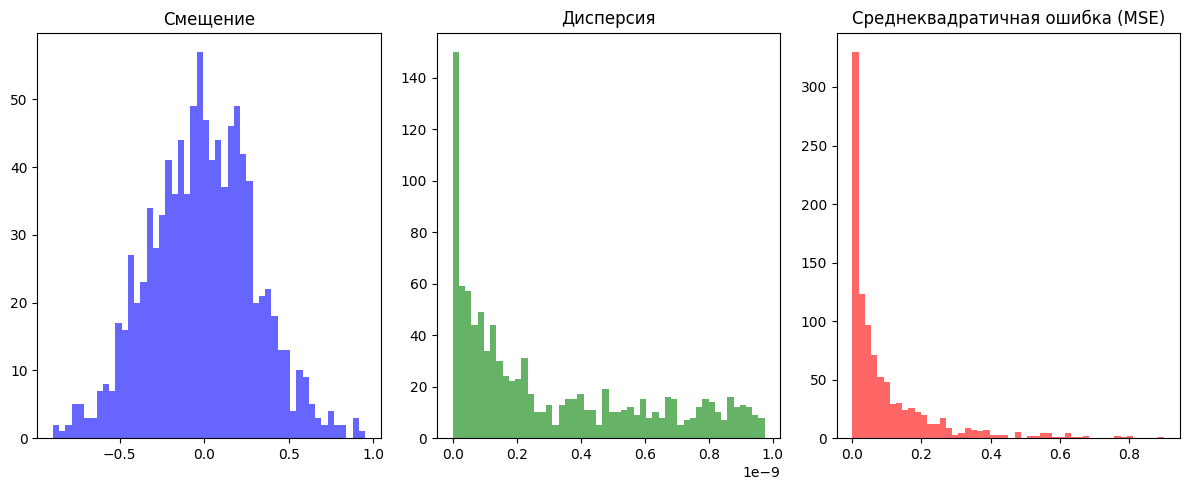

[0.87945817 0.18723453 0.32166624 0.10316257 0.99863538 0.49307115
 0.66649213 0.76091715 0.6970487  0.80502283 0.02626653 0.79856821
 0.2527535  0.26959958 0.86259489 0.10064263 0.55641353 0.20249044
 0.06734661 0.63790962 0.73839522 0.87869    0.63802143 0.80307619
 0.32404001 0.00846339 0.81280349 0.03773428 0.55152497 0.78694558
 0.57573389 0.31621974 0.9720669  0.00818303 0.99802912 0.80059595
 0.69498166 0.86059489 0.18518262 0.6697879  0.04256495 0.82857978
 0.92035748 0.23703684 0.01797029 0.20582385 0.00838195 0.93461036
 0.09066856 0.31377813 0.4777278  0.28269986 0.97514562 0.46932539
 0.35955328 0.10037096 0.29264952 0.07646435 0.14066049 0.07150387
 0.53085302 0.22344975 0.59982082 0.73888784 0.41215789 0.83483628
 0.3109085  0.87599826 0.60653493 0.16192815 0.65202442 0.01593256
 0.65766216 0.98966757 0.74859852 0.42466411 0.5538183  0.59755592
 0.96317737 0.93757741 0.44911082 0.70908238 0.73003177 0.49824579
 0.0090467  0.69292491 0.1904408  0.50376958 0.71431085 0.4323

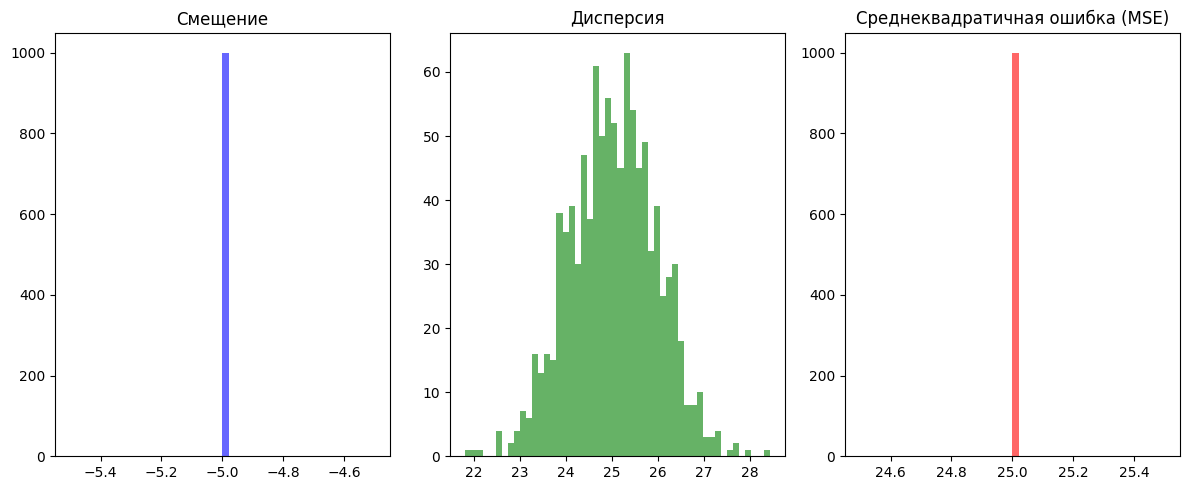

[4.92503830e-01 7.42424238e-01 1.35816138e-01 3.48625082e-01
 8.77222252e-01 9.47797036e-01 9.42354605e-02 9.01958243e-01
 8.10560902e-01 7.96330510e-01 8.92953809e-01 5.23247140e-01
 4.70652740e-01 9.32623158e-01 7.81912018e-01 7.88505712e-01
 1.66055635e-01 3.14978278e-01 1.60865309e-01 6.89339105e-01
 4.50162677e-01 7.31727908e-02 8.51652446e-01 7.41535172e-01
 5.03336441e-01 6.78904204e-01 6.23148357e-02 7.14320688e-01
 3.84575514e-01 3.67158465e-01 7.50056472e-01 4.80631732e-01
 5.92410692e-01 2.02289551e-01 4.09989643e-01 2.51215047e-01
 9.27139759e-01 7.69551252e-01 3.21094511e-01 2.15782024e-01
 1.38004468e-01 4.06877631e-01 6.46884068e-01 3.85738080e-01
 5.92106509e-01 6.33658913e-02 9.55378173e-01 5.22087877e-01
 2.48175443e-01 2.38320662e-01 6.23972252e-01 2.28182219e-01
 9.18717175e-01 8.50599607e-01 6.24431232e-01 1.35374666e-01
 5.01665523e-01 6.03184672e-01 9.08019150e-01 5.94437101e-01
 4.11238636e-01 9.78011668e-01 4.97724461e-02 4.19868756e-01
 1.79103411e-01 2.867041

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[6.49415403e-01 2.87698257e-01 4.98484913e-01 4.11024387e-02
 4.76238524e-01 4.73696087e-01 7.98014220e-01 8.81603428e-03
 7.33331500e-01 9.64459387e-01 6.99682727e-01 1.65428452e-01
 2.13584799e-01 7.16976953e-01 4.90951112e-02 6.97883805e-01
 1.16320042e-01 8.31094314e-01 2.16822468e-01 3.62805050e-02
 1.16370523e-01 8.79435603e-01 3.33401088e-03 1.45125328e-01
 9.05706019e-01 7.13076892e-03 9.73796887e-01 6.27106217e-01
 9.67596673e-01 1.98168174e-02 7.77324721e-01 9.03708212e-01
 1.91776063e-01 8.03763904e-01 8.53769445e-01 7.18257867e-01
 1.62659455e-01 6.78064150e-01 3.30052744e-01 6.56319936e-01
 8.99770489e-02 1.60081496e-01 8.96005626e-01 6.50745170e-01
 7.78478410e-01 3.35498474e-01 3.62994682e-01 4.55789100e-01
 6.30238210e-01 7.26578789e-01 8.15150829e-01 9.32288353e-02
 8.59438066e-02 9.57732748e-01 5.83895305e-01 7.27921824e-01
 8.78587611e-02 1.14026887e-01 9.74750804e-01 4.05120048e-01
 9.26393238e-01 6.28489380e-01 1.33201844e-02 4.45195100e-01
 9.64550532e-01 5.889662

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[3.31643084e-02 9.17605903e-01 2.07638204e-01 2.98589177e-02
 2.11660833e-01 4.54295451e-01 6.56738774e-01 3.31469086e-01
 8.30879038e-01 3.23380065e-01 4.85608558e-01 2.39870528e-01
 7.60959781e-01 1.62100597e-01 2.42606261e-01 1.34413632e-01
 1.80390768e-01 2.06838059e-01 7.03099963e-02 2.96726687e-01
 7.80301264e-01 8.08697677e-01 2.21729541e-02 3.31974676e-01
 7.01034806e-01 2.84097380e-01 3.67731356e-02 5.92005738e-01
 9.45006032e-01 2.12990358e-01 2.41980418e-01 8.02696822e-01
 5.09307217e-01 7.78419883e-01 2.80123301e-01 9.95384610e-01
 3.69430295e-01 9.77287917e-01 6.73532033e-01 7.48106985e-01
 4.82102525e-01 8.16996977e-01 4.51770275e-01 7.93106726e-01
 6.24109322e-01 5.02447818e-02 3.58444846e-01 1.92280517e-01
 4.51619238e-01 5.80532257e-01 6.81368106e-01 1.36846530e-01
 7.76358668e-01 4.46959151e-01 7.51909102e-01 8.03675625e-01
 7.08720836e-01 2.57980947e-01 7.15107269e-01 1.32901786e-01
 7.82185703e-01 5.74785945e-01 3.78889619e-01 5.08055793e-01
 2.63630497e-01 4.964638

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[4.93114613e-01 9.94983879e-01 3.91574843e-01 6.80196890e-01
 2.41879250e-01 8.51085344e-01 7.99547712e-01 2.81406258e-01
 7.57326584e-01 1.90442729e-01 2.84807619e-01 7.86859188e-01
 3.70019294e-01 3.66329907e-01 8.70618992e-02 2.17653357e-01
 1.70184144e-01 3.06093606e-01 3.04489581e-01 3.46122035e-01
 1.41923674e-02 7.80103507e-01 6.55476870e-01 9.74380729e-02
 4.73151949e-01 8.76238226e-01 8.98505989e-02 6.34092413e-01
 9.69227412e-01 8.98975002e-01 5.60414145e-01 4.45270641e-01
 8.60030577e-01 1.81778313e-01 1.22216702e-01 7.61858201e-02
 7.98039626e-01 1.02244005e-01 2.81965830e-01 3.74943817e-01
 4.31775673e-01 3.01711566e-01 1.44460137e-01 3.48246354e-01
 4.41318826e-01 8.48717929e-01 5.44291632e-01 2.56947506e-01
 4.51880914e-01 2.47641275e-01 1.24262426e-01 7.36878345e-01
 4.19759799e-01 9.79037321e-01 6.04172716e-01 5.20556033e-01
 6.90048290e-01 1.32297434e-01 7.75828396e-01 4.04329437e-01
 8.44062384e-01 7.60765424e-01 6.53031487e-01 3.45544248e-01
 7.94770868e-01 1.422615

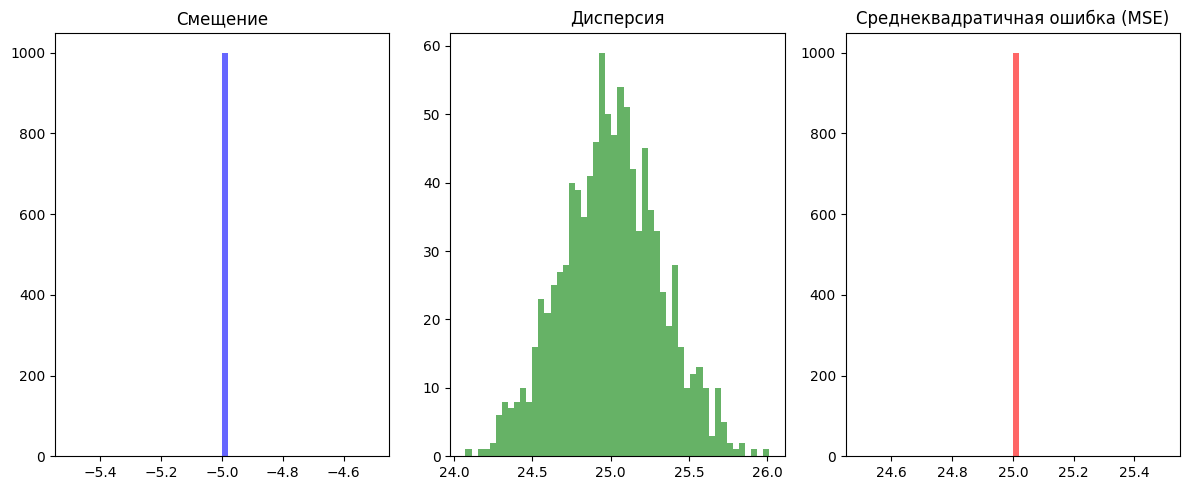

[0.24156388 0.36029048 0.33943828 ... 0.80758862 0.90186992 0.47133767]
[0.04660035 0.36082932 0.59756389 ... 0.1745971  0.15190721 0.66307008]
[0.95926925 0.87163867 0.96372691 ... 0.48593088 0.2808867  0.8669214 ]
[0.17996298 0.4224931  0.31971846 ... 0.95137766 0.57267304 0.83778211]
[0.3894838  0.97056118 0.97889901 ... 0.53622831 0.13861046 0.65883309]
[0.51454868 0.24062416 0.15932774 ... 0.09914521 0.48722175 0.91352476]
[0.56319792 0.85340908 0.9999336  ... 0.62038636 0.86935275 0.27755778]
[0.36051992 0.04504534 0.05355173 ... 0.1100791  0.38262261 0.71925412]
[0.89021937 0.51705547 0.72328493 ... 0.27769439 0.41440477 0.81720873]
[0.34922883 0.04519761 0.62232544 ... 0.32129812 0.84031543 0.79476409]
[0.36059848 0.72055956 0.62488159 ... 0.03048367 0.97233159 0.02254616]
[0.82564937 0.73481676 0.71838402 ... 0.37393825 0.02954232 0.00541283]
[0.37031312 0.45606773 0.3510572  ... 0.34777579 0.90344682 0.85085472]
[0.14067205 0.73251121 0.97234503 ... 0.4463172  0.96558771 0.13

C:\Users\DNS\AppData\Local\Temp\ipykernel_17388\1457930610.py:18: RuntimeWarning: invalid value encountered in power
  xs = (norm.ppf(samples) + theta_true) ** (1 / 3)


[0.06826398 0.85905168 0.50954722 ... 0.43723586 0.56036722 0.60923923]
[0.06512505 0.21632481 0.06489714 ... 0.87535248 0.25923543 0.03682091]
[0.39732331 0.16748354 0.87108699 ... 0.02548122 0.57509579 0.34159998]
[0.02442026 0.90026935 0.52787268 ... 0.19380107 0.18361596 0.52353585]
[0.42125972 0.81078713 0.57706115 ... 0.94188187 0.17948118 0.14140506]
[0.09464049 0.14088486 0.74565397 ... 0.17066105 0.4035822  0.88021823]
[0.81109211 0.00368116 0.02424293 ... 0.0151814  0.11160565 0.63204544]
[0.94194084 0.44788559 0.0556287  ... 0.84242116 0.78753021 0.13399601]
[0.50644499 0.39279707 0.60947091 ... 0.59564156 0.6504441  0.72675233]
[0.19134907 0.48798354 0.08260144 ... 0.45593688 0.35560007 0.40393338]
[0.26758609 0.00328016 0.7044159  ... 0.10594686 0.92649493 0.74566717]
[0.43215743 0.40952187 0.17359551 ... 0.64122207 0.57208125 0.26216549]
[0.2682796  0.33302178 0.0756156  ... 0.95200224 0.66601245 0.61330291]
[8.55597111e-01 8.53818416e-01 8.26430462e-01 ... 6.45228868e-04

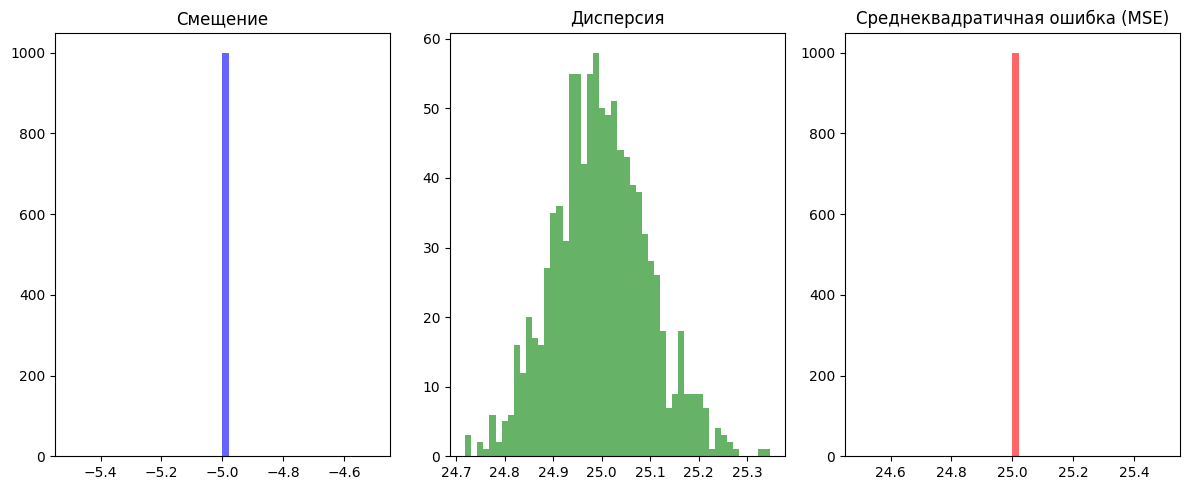

In [19]:
# Визуализация результатов
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.hist(biases, bins=50, color='b', alpha=0.6)
plt.title("Смещение")

plt.subplot(132)
plt.hist(variances, bins=50, color='g', alpha=0.6)
plt.title("Дисперсия")

plt.subplot(133)
plt.hist(mse, bins=50, color='r', alpha=0.6)
plt.title("Среднеквадратичная ошибка (MSE)")

plt.tight_layout()
plt.show()